New Question Idea: What if we could predict whether a team was going to win a challenge? Possible features: challenge type: Immunity or Reward Number of Players on Team: Number of Players on opposing Team: % of women on team: Number of Challenges Previously Won: or Whether last challenge was won or lost: weather: Win or Loss: Average age of castaways on the team: type of challenge:

# Data Cleaning

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [67]:
castaways = pd.read_csv("castaways.csv")
challenges = pd.read_csv("challenges.csv")
viewers = pd.read_csv("viewers.csv")
gender = pd.read_csv("SurvivorPlayersCaunceTypes1636556879.csv")
ind_chall = pd.read_csv("ind_chall.csv")

newest_season_full = castaways[castaways.season == 41]
castaways = castaways[castaways.season != 41]

In [68]:
castaways['win'] = castaways.result.apply(lambda x: 1 if x == "Sole Survivor" else 0)
castaways.castaway_id = castaways.castaway_id.astype(object)
#castaways.win = castaways.win.astype(object)

In [69]:
gender['full_name'] = gender['First Name'] + " " + gender[' Last Name']
gender = gender[['full_name', ' Sex']]

In [75]:
castaways = castaways[['castaway_id','full_name', 'age', 'personality_type', 'state', 'win', 'season']]

,castaway_id,full_name,age,personality_type,state,win,season
296,265,Robert Crowley,57,INTP,Maine,1,17


In [133]:

cast2 = pd.merge(castaways, gender, how = 'left')

nogen = cast2[pd.isna(cast2[' Sex']) == True][cast2.win == 1]
nogen[' Sex'] = nogen[' Sex'].replace(np.nan, "M")
nogen = nogen[['full_name', ' Sex']]

cast1 = pd.merge(cast2, nogen, on = 'full_name', how = 'outer')
cast1

cast1[' Sex'] = 0
for i in cast1[' Sex']:
    if cast1[]


<ipython-input-133-46ca4fbb315f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nogen = cast2[pd.isna(cast2[' Sex']) == True][cast2.win == 1]


,castaway_id,full_name,age,personality_type,state,win,season,Sex_x,Sex_y
0,1,Sonja Christopher,63,ENFP,California,0,1,F,NaN
1,2,B.B. Anderson,64,ESTJ,Kansas,0,1,NaN,NaN
2,3,Stacey Stillman,27,ENTJ,California,0,1,F,NaN
3,4,Ramona Gray,29,ISTJ,New Jersey,0,1,F,NaN
4,5,Dirk Been,23,ISFP,Wisconsin,0,1,M,NaN
...,...,...,...,...,...,...,...,...,...
1018,588,Noura Salman,36,ENFP,Maryland,0,39,NaN,NaN
1019,589,Dean Kowalski,28,ISTP,New York,0,39,NaN,NaN
1020,590,Tommy Sheehan,26,ENFJ,New York,1,39,NaN,M
1021,27,Amber Mariano,40,ISFP,Florida,0,40,NaN,NaN


In [128]:
cast1 = cast1.dropna()
cast1 = cast1.drop_duplicates()
newest_season_full[' Sex'] = ('M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M')
newest_season = newest_season_full[['age', 'personality_type', 'state', ' Sex']]

In [129]:
cast = cast1[['age', 'personality_type', 'state', ' Sex', 'win']]

In [130]:
cast1[cast1.win == 1].reset_index()

,index,castaway_id,full_name,age,personality_type,state,win,season,Sex
0,20,16,Richard Hatch,39,ENTP,Rhode Island,1,1,M
1,47,32,Tina Wesson,40,ESFJ,Tennessee,1,2,F
2,67,48,Ethan Zohn,27,ISFP,Massachusetts,1,3,M
3,88,64,Vecepia Towery,36,ISTJ,California,1,4,F
4,105,80,Brian Heidik,34,ISTP,California,1,5,M
5,122,96,Jenna Morasca,21,ISTP,Pennsylvania,1,6,F
6,146,112,Sandra Diaz-Twine,29,ESTP,Washington,1,7,F
7,190,27,Amber Brkich,25,ISFP,Pennsylvania,1,8,F
8,211,130,Chris Daugherty,33,ENTP,Ohio,1,9,M
9,234,150,Tom Westman,40,ESTJ,New York,1,10,M


In [ ]:
bob = ()

# Exploratory Data Analysis

In [8]:
percent_wins = cast.groupby(['personality_type', 'state', ' Sex']).mean().reset_index()
percent_wins.sort_values(by = 'win', axis = 0, ascending = False).head(20)

,personality_type,state,Sex,age,win
229,ISFJ,Arkansas,F,26.000000,1.000000
166,ESTP,Washington,F,29.000000,1.000000
67,ENTP,Ohio,M,33.000000,1.000000
42,ENFP,Utah,M,22.000000,1.000000
178,INFJ,Texas,F,29.000000,1.000000
177,INFJ,Pennsylvania,M,34.000000,0.500000
100,ESFP,Idaho,M,35.000000,0.500000
259,ISFP,Massachusetts,M,29.500000,0.500000
171,INFJ,Iowa,F,44.500000,0.500000
69,ENTP,Rhode Island,M,40.500000,0.500000


In [9]:
state_wins = cast[['win', 'state']].groupby(['state']).mean().reset_index()

<AxesSubplot:xlabel='win', ylabel='state'>

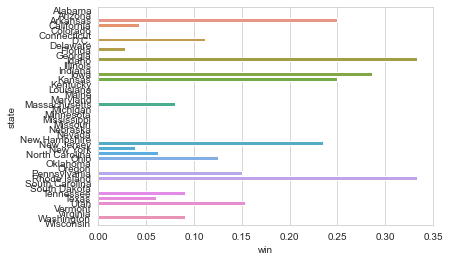

In [10]:
sns.barplot(x = 'win', y = 'state', data = state_wins)

<AxesSubplot:xlabel='win', ylabel='age'>

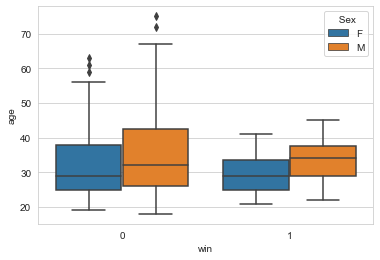

In [11]:
sns.boxplot(x = 'win', y = 'age', data = cast, hue = ' Sex')

<AxesSubplot:xlabel='win', ylabel='personality_type'>

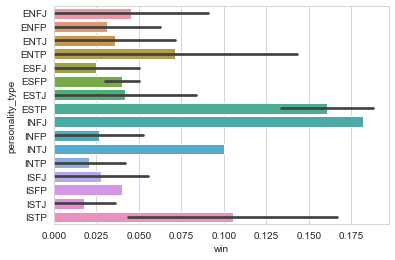

In [12]:
pers_sex_int = cast[['personality_type', ' Sex', 'win']].groupby(['personality_type', ' Sex']).mean().reset_index()
sns.barplot(x = 'win', y = 'personality_type', data = pers_sex_int)

<AxesSubplot:xlabel='personality_type', ylabel='win'>

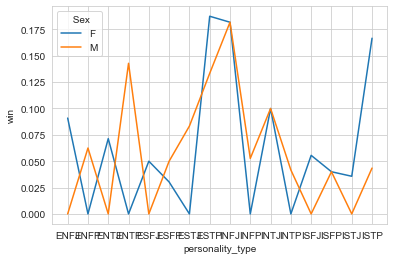

In [13]:
sns.lineplot(x = 'personality_type', y = 'win', data = pers_sex_int, hue = ' Sex')

# Modeling

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier       
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier     
from sklearn import tree, preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler 

In [15]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
pers_encoded=le.fit_transform(cast['personality_type'])
state_encoded=le.fit_transform(cast['state'])
test_encoded=le.fit_transform(cast[' Sex'])

cast['personality_type'] = pers_encoded
cast['state'] = state_encoded
cast[' Sex'] = test_encoded
cast

<ipython-input-15-90fd6d95e05d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast['personality_type'] = pers_encoded
<ipython-input-15-90fd6d95e05d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast['state'] = state_encoded
<ipython-input-15-90fd6d95e05d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,age,personality_type,state,Sex,win
0,63,1,3,0,0
1,27,2,3,0,0
2,29,14,27,0,0
3,23,13,43,1,0
4,27,6,2,1,0
...,...,...,...,...,...
885,42,14,30,0,0
886,29,11,21,0,0
887,38,7,28,1,0
888,33,8,33,1,1


In [16]:
Y = cast.win
X = cast[['age', 'personality_type', 'state', ' Sex']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=713, test_size=0.4)

In [18]:
nb = MultinomialNB()

In [19]:
def hw (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    y_prob_test = model.predict_proba(X_test)[:,1]
    y_prob_train = model.predict_proba(X_test)[:,1]
    train_accuracy = metrics.accuracy_score(y_train, y_hat_train)
    test_accuracy = metrics.accuracy_score(y_test, y_hat_test)
    f1_test = metrics.f1_score(y_test, y_hat_test)
    f1_train = metrics.f1_score(y_train, y_hat_train)
    auc_test = roc_auc_score(y_test, y_prob_test)
    auc_train = roc_auc_score(y_test, y_prob_train)
    total = {'accuracy': [train_accuracy,test_accuracy], 'F1':[f1_train, f1_test], 'AUC': [auc_train, auc_test] }
    df = pd.DataFrame.from_dict(total, orient = 'index', columns = ['train', 'test'])
    return [df, y_prob_test]

In [20]:
nb_res = hw(nb, X_train, y_train, X_test, y_test)
nb_res[0]

,train,test
accuracy,0.837535,0.815126
F1,0.147059,0.083333
AUC,0.580513,0.580513


In [22]:
lr = LogisticRegression(solver='liblinear', C=1)
lr_res = hw(lr, X_train, y_train, X_test, y_test)
lr_res[0]

,train,test
accuracy,0.941176,0.945378
F1,0.000000,0.000000
AUC,0.533333,0.533333


In [23]:
dc = DecisionTreeClassifier()
all_scores = []
tree_depth = np.arange(2,30)
for d in tree_depth:
    tree = DecisionTreeClassifier(max_depth=d) 
    scores = cross_val_score(tree,X_train,y_train, cv=10) 
    all_scores.append(scores.mean())
n_depth = tree_depth[np.argmax(all_scores)]
print(n_depth)

2


In [24]:
dc = DecisionTreeClassifier(max_depth = n_depth)
dc_res = hw(dc, X_train, y_train, X_test, y_test)
dc_res[0]

,train,test
accuracy,0.941176,0.945378
F1,0.000000,0.000000
AUC,0.547009,0.547009


In [25]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=3)
rf_res = hw(rf, X_train, y_train, X_test, y_test)
rf_res[0]

,train,test
accuracy,0.941176,0.945378
F1,0.000000,0.000000
AUC,0.498291,0.498291


In [26]:
gb = GradientBoostingClassifier(n_estimators=75, learning_rate=.1)
gb_res = hw(gb, X_train, y_train, X_test, y_test)
gb_res[0]

,train,test
accuracy,0.971989,0.924370
F1,0.687500,0.000000
AUC,0.475385,0.475385


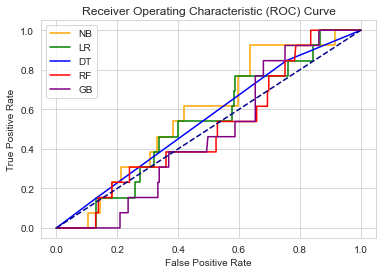

In [27]:
fpr, tpr, thresh = roc_curve(y_test, nb_res[1])
fpr_l, tpr_l, thresh_l = roc_curve(y_test, lr_res[1])
fpr_2, tpr_2, thresh_2 = roc_curve(y_test, dc_res[1])
fpr_3, tpr_3, thresh_3 = roc_curve(y_test, rf_res[1])
fpr_4, tpr_4, thresh_4 = roc_curve(y_test, gb_res[1])

plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_l, tpr_l, color='green', label='LR')
plt.plot(fpr_2, tpr_2, color='blue', label='DT')
plt.plot(fpr_3, tpr_3, color='red', label='RF')
plt.plot(fpr_4, tpr_4, color='purple', label='GB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Results

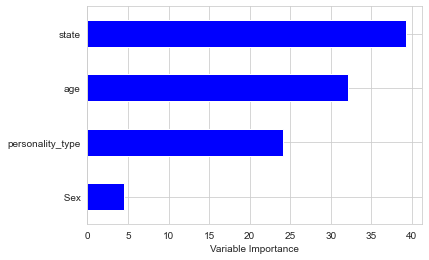

In [28]:
Importance = pd.DataFrame({'Importance':gb.feature_importances_*100}, index=X.columns)
Importance = Importance.iloc[gb.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', color='b', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [42]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(nb, X, Y)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
features = X.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. state (0.018487)
2. age (0.011092)
3.  Sex (0.005714)
4. personality_type (0.001345)


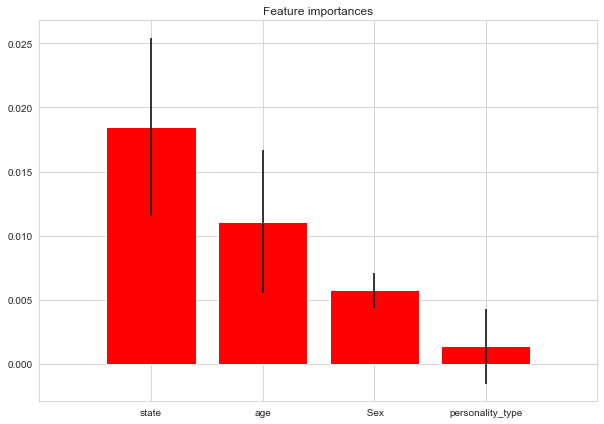

In [44]:
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features[indices[i]] for i in range(4)])
plt.xlim([-1, X.shape[1]])
plt.show()

# Prediction for Season 41

In [29]:
pers_encoded=le.fit_transform(newest_season['personality_type'])
state_encoded=le.fit_transform(newest_season['state'])
test_encoded=le.fit_transform(newest_season[' Sex'])

newest_season['personality_type'] = pers_encoded
newest_season['state'] = state_encoded
newest_season[' Sex'] = test_encoded

<ipython-input-29-56808021aed6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newest_season['personality_type'] = pers_encoded
<ipython-input-29-56808021aed6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newest_season['state'] = state_encoded
<ipython-input-29-56808021aed6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [31]:
season_41_preds = nb.predict(newest_season)
season_41_pred_prob = pd.DataFrame(nb.predict_proba(newest_season))
list(season_41_pred_prob.iloc[:, 1])

[0.001602347651049644,
 0.0065589547460739184,
 0.002871249396588444,
 0.002720863036947508,
 0.02020049574068185,
 0.0012481885250657295,
 0.007127969884361475,
 0.0009859955515514958,
 0.001198988971047037,
 0.007556267124849018,
 0.009945152243934632,
 0.002139643367438667,
 0.019050654481295552,
 0.006691637114563085,
 0.000846857862082085,
 0.007603401838317455,
 0.005778491536623382,
 0.009400579753262556]

In [32]:
newest_season_full['prediction_probs'] = list(season_41_pred_prob.iloc[:, 1])
newest_season_full[['full_name', 'prediction_probs']]

,full_name,prediction_probs
744,Eric Abraham,0.001602
745,Sara Wilson,0.006559
746,David Voce,0.002871
747,Brad Reese,0.002721
748,Jairus Robinson,0.020200
749,Genie Chen,0.001248
750,Sydney Segal,0.007128
751,Tiffany Seely,0.000986
752,Naseer Muttalif,0.001199
753,Evvie Jagoda,0.007556


In [33]:
newest_season_full[['full_name', 'prediction_probs']][newest_season_full.prediction_probs == newest_season_full.prediction_probs.max()]

,full_name,prediction_probs
748,Jairus Robinson,0.0202


In [36]:
castaways = castaways.dropna()
done = pd.DataFrame(nb.predict_proba(X))
cast1['predict'] = list(done.iloc[:,1])
cast1['pred'] = nb.predict(X)

In [37]:
cast1[cast1.full_name == "Tony Vlachos"]

,castaway_id,full_name,age,personality_type,state,win,Sex,predict,pred
731,424,Tony Vlachos,39,ESTP,New Jersey,1,M,0.112470,0
733,424,Tony Vlachos,42,ESTP,New Jersey,0,M,0.084730,0
735,424,Tony Vlachos,45,ESTP,New Jersey,1,M,0.063343,0
